<a href="https://colab.research.google.com/github/hargurjeet/Adhoc-Activities/blob/main/Data_Preprocessing_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PREPROCESSING USING PYTHON**

The notebook comprises a collection of commonly used preprocessing techniques that are essential for conducting effective data analysis and data science activities.

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from scipy import stats

### **Importing Data**

In [2]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/hargurjeet/Adhoc-Activities/main/Titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Handling Missing Values and Outliers**

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Key Observation - 
- Age and Cabin columns seems to have missing data

### **Mean Imputation**

In [4]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean') ## Startegy can be mode and median based on the requirement
titanic_df[['Age']] = imputer.fit_transform(titanic_df[['Age']])

# Verify the changes
print(titanic_df['Age'].isnull().sum())

0


### **Imputation Using ML Algo**

In [5]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/hargurjeet/Adhoc-Activities/main/Titanic_train.csv")
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Initialize the IterativeImputer
imputer = IterativeImputer(random_state=0)

# Fit and transform the data
age_imputed = imputer.fit_transform(titanic_df[['Age']])

# Replace the original 'Age' column with the imputed data
titanic_df['Age'] = age_imputed

# Check if there are any missing values left
print(titanic_df['Age'].isnull().sum())

0


### **Outlier Identification - Visual**

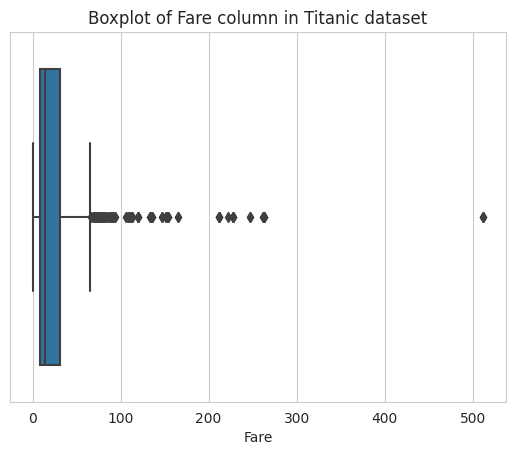

In [7]:
# Show the plot
sns.set_style("whitegrid")
sns.boxplot(x=titanic_df['Fare'])
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('Fare')
plt.title('Boxplot of Fare column in Titanic dataset')
plt.show()

### Outlier Identification - IQR

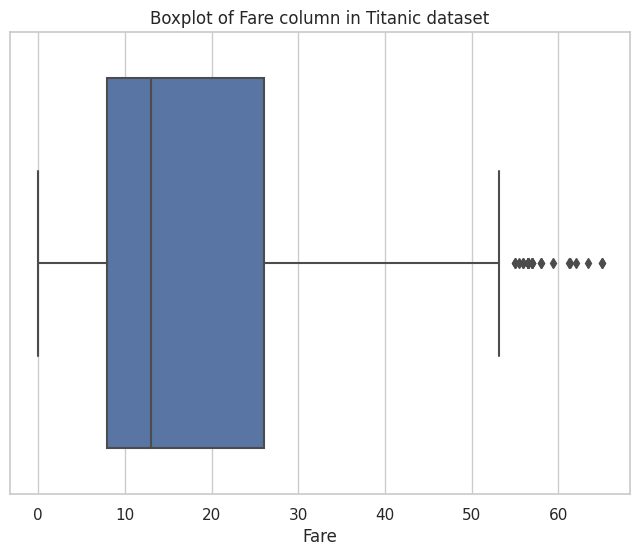

In [8]:
# Calculate the IQR
q1 = titanic_df['Fare'].quantile(0.25)
q3 = titanic_df['Fare'].quantile(0.75)
iqr = q3 - q1

# Calculate the upper and lower bounds
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# print(lower_bound, upper_bound)
# Identify the outliers and filtering them out
titanic_df = titanic_df[(titanic_df['Fare'] >= lower_bound) & (titanic_df['Fare'] <= upper_bound)]

# Show the plot
sns.set_style("whitegrid")
sns.boxplot(x=titanic_df['Fare'])
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('Fare')
plt.title('Boxplot of Fare column in Titanic dataset')
plt.show()

### Outlier Identification - Z Score

In [9]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/hargurjeet/Adhoc-Activities/main/Titanic_train.csv")

z_scores = stats.zscore(titanic_df['Fare'])
abs_z_scores = np.abs(z_scores)

# Setting the threshold z-score value to 3
threshold = 3
outlier_indices = np.where(abs_z_scores > threshold)[0]
outlier_values = titanic_df['Fare'][outlier_indices]

print("Number of outliers:", len(outlier_values))
print("Outlier values:", outlier_values)

Number of outliers: 20
Outlier values: 27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


## **Handling Categorical Data**

### Mode Imputation

In [10]:
## Impute missing values in 'Sex' and 'Embarked' columns with most frequent value
imputer = SimpleImputer(strategy='most_frequent')
titanic_df[['Embarked']] = imputer.fit_transform(titanic_df[['Embarked']])

# Verify the changes
print(titanic_df[['Embarked']].isnull().sum())

Embarked    0
dtype: int64


### KNN Imputation, Missing Category and Label Encoding

In [11]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/hargurjeet/Adhoc-Activities/main/Titanic_train.csv")

# print the null records
print(titanic_df[['Embarked']].isnull().sum())

# Encode the 'Sex' column
le = LabelEncoder()

# Encode the 'Embarked' column
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('Unknown')
titanic_df['Embarked'] = le.fit_transform(titanic_df['Embarked'])

# define the KNN imputer with k=5
imputer = KNNImputer(n_neighbors=5)

# impute missing values in the 'Sex' and 'Embarked' columns
titanic_imputed = imputer.fit_transform(titanic_df[['Embarked']])

# print the imputed dataset
titanic_df['Embarked'] = titanic_imputed
print(titanic_df[['Embarked']].isnull().sum())

Embarked    2
dtype: int64
Embarked    0
dtype: int64


## **Categorical Data - Encoding Techniques**

### One Hot Encoding

In [12]:
# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# One hot encode 'Sex' and 'Embarked' columns
encoded_cols = encoder.fit_transform(titanic_df[['Sex', 'Embarked']])

# Convert the encoded columns to a dataframe and append to the original dataframe
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))
titanic_df = pd.concat([titanic_df, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
encoded_df

,Sex_female,Sex_male,Embarked_0.0,Embarked_1.0,Embarked_2.0,Embarked_3.0
0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0
887,1.0,0.0,0.0,0.0,1.0,0.0
888,1.0,0.0,0.0,0.0,1.0,0.0
889,0.0,1.0,1.0,0.0,0.0,0.0


## **Feature Scaling**

### Min Max scaler

In [14]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/hargurjeet/Adhoc-Activities/main/Titanic_train.csv")
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# select numerical columns
num_cols = ['Age', 'Fare']

# create StandardScaler object
scaler = MinMaxScaler()

# fit and transform the data
titanic_df[num_cols] = scaler.fit_transform(titanic_df[num_cols])

# print the standardized data
print(titanic_df[num_cols].describe())

              Age        Fare
count  714.000000  891.000000
mean     0.367921    0.062858
std      0.182540    0.096995
min      0.000000    0.000000
25%      0.247612    0.015440
50%      0.346569    0.028213
75%      0.472229    0.060508
max      1.000000    1.000000


### Log tranformations

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Fare', ylabel='Count'>

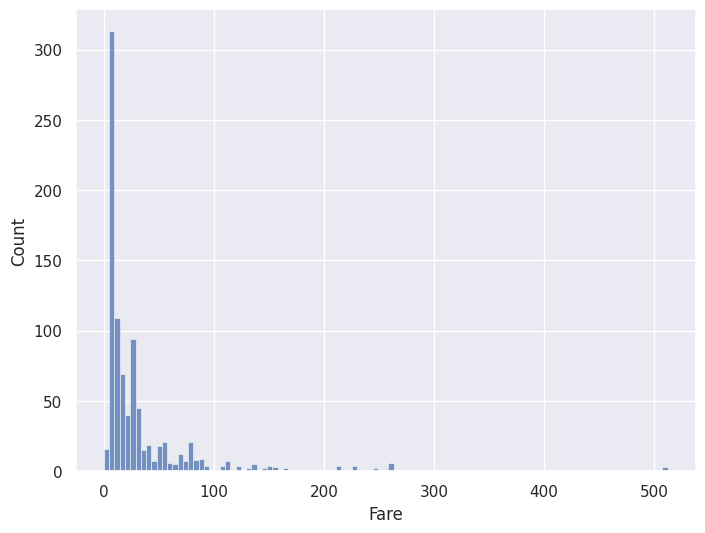

In [29]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/hargurjeet/Adhoc-Activities/main/Titanic_train.csv")

# Apply log transformation to the "Fare" column
titanic_df_log = np.log(titanic_df['Fare']).copy()

sns.histplot(data= titanic_df, x= 'Fare')

<Axes: xlabel='Fare', ylabel='Count'>

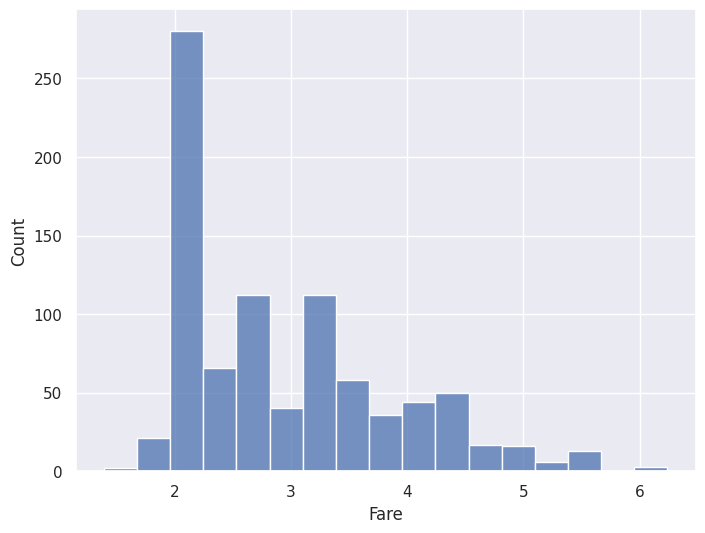

In [30]:
sns.histplot( x=titanic_df_log)

### Power tranformations

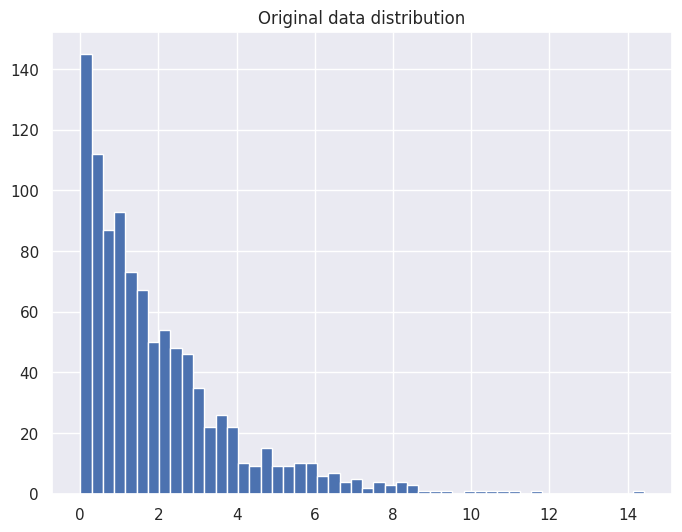

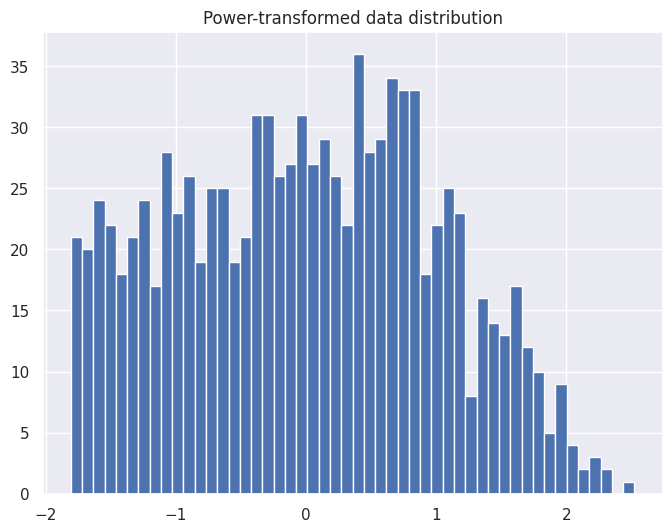

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Generate some skewed data
data = np.random.exponential(scale=2, size=1000)

# Visualize the data distribution
plt.hist(data, bins=50)
plt.title("Original data distribution")
plt.show()

# Apply power transformation
pt = PowerTransformer(method='yeo-johnson')
data_pt = pt.fit_transform(data.reshape(-1, 1))

# Visualize the transformed data distribution
plt.hist(data_pt, bins=50)
plt.title("Power-transformed data distribution")
plt.show()


## **Reference Material**

- Read menthod pandas - https://realpython.com/pandas-read-write-files/
- Sklearn Imputer - https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
- Sklearn pre processing - https://scikit-learn.org/stable/modules/preprocessing.html